<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/statistical_inference_class/math_and_stats/confidence_intervals_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://rpsychologist.com/d3/ci/

**CI_Overlap**

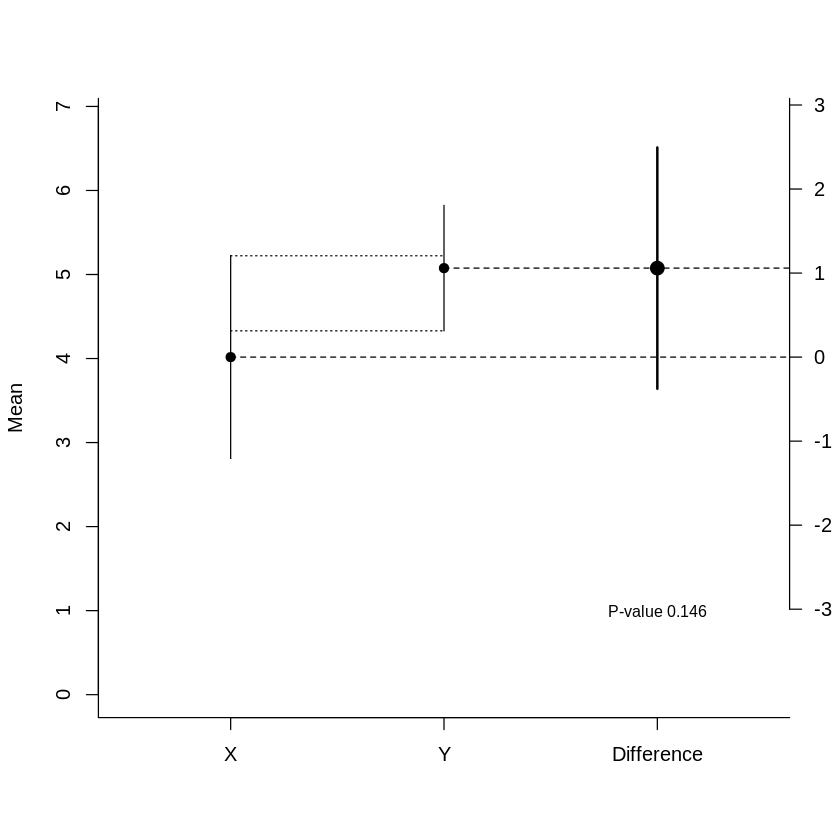

In [ ]:
#CI mean dif based on code from: http://stackoverflow.com/questions/16913849/how-to-plot-absolute-values-and-differences-including-confidence-intervals
m1 <- 3 #mean group 1
m2 <- 5 #mean group 2
sd1 <- 4.5 #sd group 1
sd2 <- 3.0 #sd group 2
n1 <- 50 #sample size group 1
n2 <- 50 #sample size group 2
x<-rnorm(n = n1, mean = m1, sd = sd1) #get sample group 1
y<-rnorm(n = n2, mean = m2, sd = sd2) #get sample group 2
error1 <- qnorm(0.975)*sd(x)/sqrt(n1) #get error group 1
error2 <- qnorm(0.975)*sd(y)/sqrt(n2) #get error group 2
CI_l_1 <- mean(x)-error1 #calculate confidence interval lower limit group 1
CI_u_1 <- mean(x)+error1 #calculate confidence interval upper limit group 1
CI_l_2 <- mean(y)-error2 #calculate confidence interval lower limit group 2
CI_u_2 <- mean(y)+error2 #calculate confidence interval upper limit group 2

se <- sqrt(sd(x)*sd(x)/n1+sd(y)*sd(y)/n2) #calc pooled standard error
error <- qt(0.975,df=n1+n2-2)*se #error mean dif
mdif<-mean(y)-mean(x) #mean dif
CI_l_d <- mdif-error #CI lower limit difference
CI_u_d <- mdif+error #CI upper limit difference

d = data.frame(labels=c("X","Y","Difference"), 
               mean=c(mean(x),mean(y),mdif),
               lower=c(CI_l_1,CI_l_2,CI_l_d),
               upper = c(CI_u_1,CI_u_2,CI_u_d))

#png(file=paste('CI_means_meandiff.png'),width=4000,height=6000, res = 1000)
plot(NA, xlim=c(.5,3.5), ylim=c(0, max(d$upper[1:2]+1)), bty="l", xaxt="n", xlab="",ylab="Mean")
points(d$mean[1:2], pch=19)
segments(1,d$mean[1],5,d$mean[1],lty=2)
segments(2,d$mean[2],5,d$mean[2],lty=2)
axis(1, 1:3, d$labels)
segments(1:2,d$lower[1:2],1:2,d$upper[1:2])
axis(4, seq((d$mean[1]-3),(d$mean[1]+5),by=1), seq(-3,5,by=1), las=1)
points(3,d$mean[1]+d$mean[3],pch=19, cex=1.5)
segments(3,d$mean[1]+d$lower[3],3,d$mean[1]+d$upper[3], lwd=2)
mtext("Difference", side=4, at=d$mean[1], line=3)
segments(1:1,d$upper[1:1],1:2,d$upper[1:1],lty=3)
segments(1:1,d$lower[1:2],1:2,d$lower[1:2],lty=3)
text(3, 1, paste("P-value",round(t.test(x,y,var.equal=TRUE)$p.value, digits=3)), cex = .8)
#dev.off()

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

**Confidence Intervals Mean**

Loading required package: ggplot2

Loading required package: Rcpp



95.15 % of the 95% confidence intervals contained the true meanThe capture percentage for the plotted study, or the % of values within the observed confidence interval from 89.68204 to 102.0751 is: 73.147 %

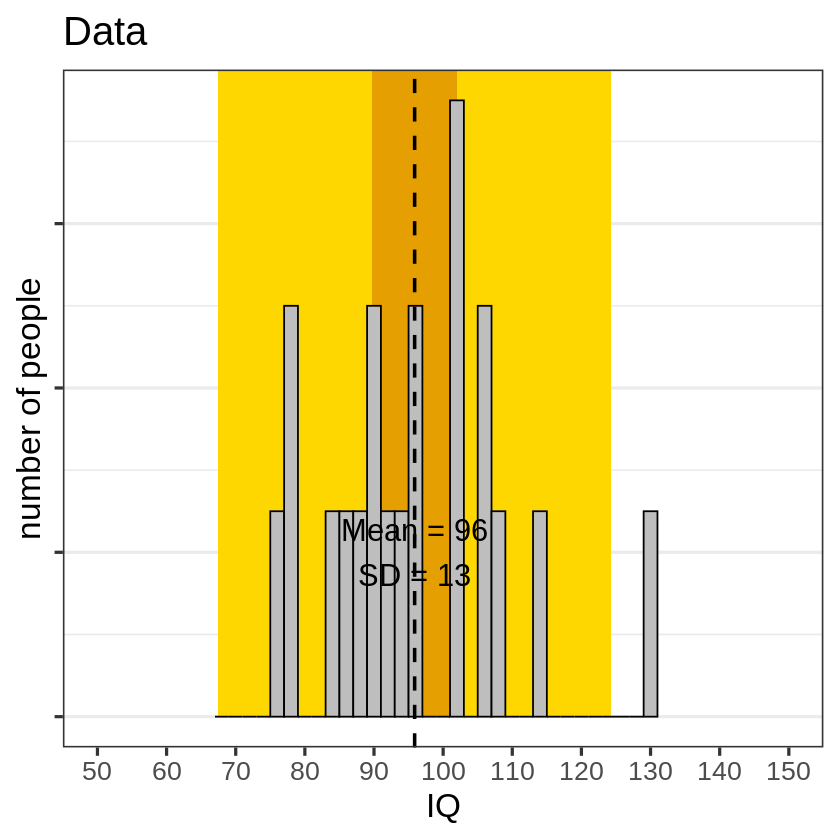

In [ ]:
#This scripts will simulate a single sample, and calculate the mean
#The gold background illustrates the 95% prediction interval (PI), The orange background illustrates the 95% confidence interval
#The black dotted line illustrates the true mean. 95% of the CI should contain the true mean
#Then, a simulation is run. The simulations generates a large number of additional samples
#The simulation returns the number of CI that contain the mean, and returns the % of means from future studies that fall within the 95% of the original study
#This is known as the capture percentage. It differs from (and is lower than) the confidence interval 

if(!require(ggplot2)){install.packages('ggplot2')}
library(ggplot2)
if(!require(Rcpp)){install.packages('Rcpp')}
library(Rcpp)

n=20 #set sample size
nSims<-100000 #set number of simulations

x<-rnorm(n = n, mean = 100, sd = 15) #create sample from normal distribution

#95% Confidence Interval
CIU<-mean(x)+qt(0.975, df = n-1)*sd(x)*sqrt(1/n)
CIL<-mean(x)-qt(0.975, df = n-1)*sd(x)*sqrt(1/n)

#95% Prediction Interval
PIU<-mean(x)+qt(0.975, df = n-1)*sd(x)*sqrt(1+1/n)
PIL<-mean(x)-qt(0.975, df = n-1)*sd(x)*sqrt(1+1/n)

#plot data
#png(file="CI_mean.png",width=2000,height=2000, res = 300)
ggplot(as.data.frame(x), aes(x))  + 
  geom_rect(aes(xmin=PIL, xmax=PIU, ymin=0, ymax=Inf), fill="gold") + #draw orange CI area
  geom_rect(aes(xmin=CIL, xmax=CIU, ymin=0, ymax=Inf), fill="#E69F00") + #draw orange CI area
  geom_histogram(colour="black", fill="grey", aes(y=..density..), binwidth=2) +
  xlab("IQ") + ylab("number of people")  + ggtitle("Data") + theme_bw(base_size=20) + 
  theme(panel.grid.major.x = element_blank(), axis.text.y = element_blank(), panel.grid.minor.x = element_blank()) + 
  geom_vline(xintercept=mean(x), colour="black", linetype="dashed", size=1) + 
  coord_cartesian(xlim=c(50,150)) + scale_x_continuous(breaks=c(50,60,70,80,90,100,110,120,130,140,150)) +
  annotate("text", x = mean(x), y = 0.02, label = paste("Mean = ",round(mean(x)),"\n","SD = ",round(sd(x)),sep=""), size=6.5)
#dev.off()

#Simulate Confidence Intervals
CIU_sim<-numeric(nSims)
CIL_sim<-numeric(nSims)
mean_sim<-numeric(nSims)

for(i in 1:nSims){ #for each simulated experiment
  x<-rnorm(n = n, mean = 100, sd = 15) #create sample from normal distribution
  CIU_sim[i]<-mean(x)+qt(0.975, df = n-1)*sd(x)*sqrt(1/n)
  CIL_sim[i]<-mean(x)-qt(0.975, df = n-1)*sd(x)*sqrt(1/n)
  mean_sim[i]<-mean(x) #store means of each sample
}

#Save only those simulations where the true value was inside the 95% CI
CIU_sim<-CIU_sim[CIU_sim<100]
CIL_sim<-CIL_sim[CIL_sim>100]

cat((100*(1-(length(CIU_sim)/nSims+length(CIL_sim)/nSims))),"% of the 95% confidence intervals contained the true mean")

#Calculate how many times the observed mean fell within the 95% CI of the original study
mean_sim<-mean_sim[mean_sim>CIL&mean_sim<CIU]
cat("The capture percentage for the plotted study, or the % of values within the observed confidence interval from",CIL,"to",CIU,"is:",100*length(mean_sim)/nSims,"%")

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/